# Short Test 3 (Sem B)
## **Question 1**
Consider an Ornstein-Uhlenbeck process V(t)

with $k = 3$ and $V (0) = -0.5$.

Determine using your own numerical algorithm the average time it takes to reach $1.35$ for the first time (2 significant figures). I.e., at what time does it reach a value that is equal to or larger than $1.35$.

### **Part A**: Determine the time it takes for a single walker (single process), $\tau_i$.
From lectures, we have that the numerical scheme for the Ornstein-Uhlenbeck process is
$$\begin{align*}
&V(t+\Delta t)-V(t)=\sqrt{\Delta t}Z(t)-kV(t)\Delta t\\
\Rightarrow &V(t+\Delta t)=(1-k\Delta t)V(t)+\sqrt{\Delta t}Z(t)
\end{align*}$$

In [23]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
from jupyterplot import ProgressPlot
'''PARAMS'''
%matplotlib inline
np.set_printoptions(precision=2)
time, tstep = 100, 0.005
mu, sigma = 0, 1
k=3

Generate random numbers of the variable $Z(t)$, plot the result to ensure distribution approximates a Gaussian.

20000

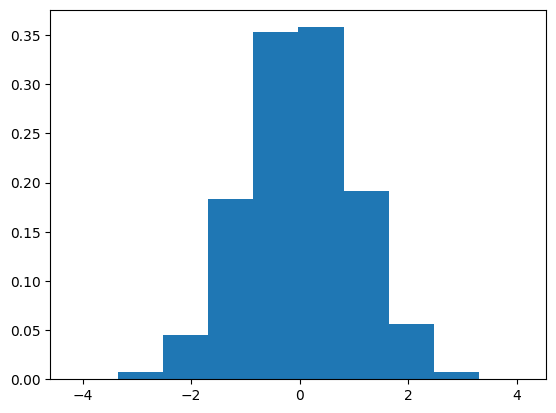

In [24]:
Z = np.random.normal(mu, sigma, round(time/tstep))
plt.hist(Z, density=True)
len(Z)

Creating an array $V(t): t\in [0,40]$ and $V(0)=-0.5$.

In [25]:
V = np.zeros(round(time/tstep))
V[0] = -0.5
V

array([-0.5,  0. ,  0. , ...,  0. ,  0. ,  0. ])

We now fill in our values for the function, now shown in index form
$$
V_{i+1}=(1-k\Delta t)V_i+\sqrt{\Delta t}Z_i
$$

In [26]:
'''ORNSTEIN-UHLENBECK PROCESS'''
def ornsteinUhlenbeck(V, Z, time, tstep, k):
    sqrtTStep = np.sqrt(tstep)
    for i in range(1,round(time/tstep)):
        V[i] = 1-(k*tstep)
        V[i] *= V[i-1]
        V[i] += sqrtTStep*Z[i-1]
    return V
V = ornsteinUhlenbeck(V, Z, time, tstep, k)

In [27]:
'''PARAMS'''
walkers = 10

Creating a plot of V(t) against time.

Time taken:	 1.575s (1.4060440998063182)


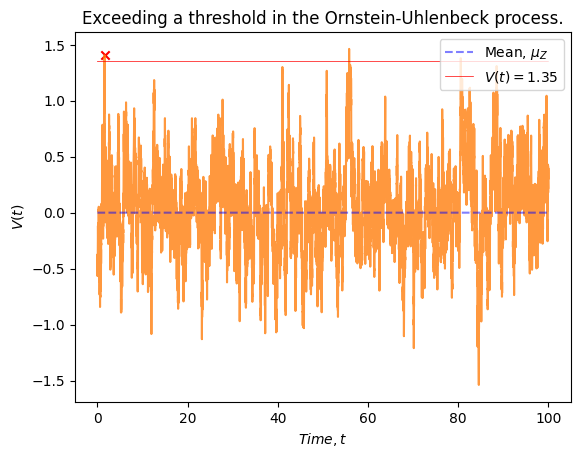

In [28]:
'''PLOTTING'''
fig, ax = plt.subplots()
T = np.arange(0, time, tstep)
ax.plot(T, V, color="C1", alpha=0.8, linestyle='-')
ax.plot(T, T*0, color="b", alpha=0.5, linestyle='--', label=r'Mean, $\mu_Z$')
ax.plot(T, np.full((round(time/tstep),), 1.35), color="r", alpha=1, linestyle='-', linewidth=0.5, label=r'$V(t)=1.35$')


'''Identify any values that meet V(t)>=1.35.'''
def getThreshold(list,increment, axis):
    loc = 0
    i = 0
    X = list.shape[0]
    while(i < X):
        if(list[i] >= 1.35):
            axis.scatter(i*increment, list[i], color="r", marker='x', label='')
            loc = i
            i = X
        i += 1
    return loc
overThreshold = getThreshold(V, tstep, ax)
if(overThreshold):
    print('Time taken:\t',str(overThreshold*tstep)+'s ('+str(V[overThreshold])+')')
else:
    print('None')
ax.set_title('Exceeding a threshold in the Ornstein-Uhlenbeck process.')
ax.set_xlabel(r'$Time, t$')
ax.set_ylabel(r'$V(t)$')
ax.legend(loc="upper right");
#plt.ylim(-3,3);

## *Question 2*
Now take the average over many walkers (multiple processes), $\tau=\langle\tau_i\rangle$. The amount of walkers and timestep should be chosen, such that the answer is accurate to at least two significant figures.


Here I tested out the idea of executing many walks. The number of walks is predefined and so too is the total duration allowed.

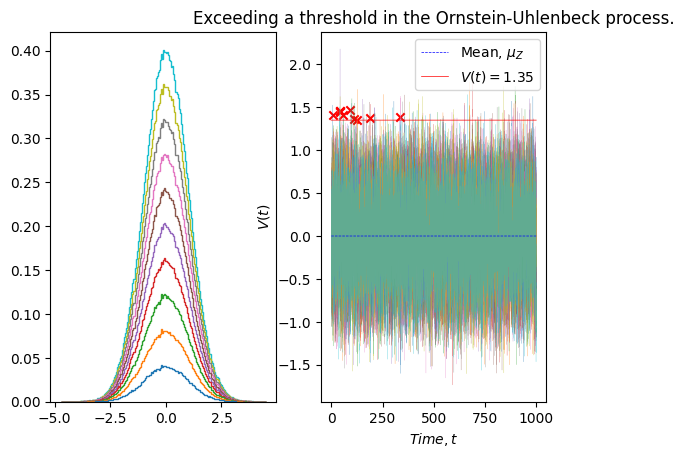

In [29]:
'''PARAMS'''
walkers = 10     # number of walkers
tstep = 0.01     # time step
time = 1000    # length of time (number of random variables)
overThreshold = []; np.array(overThreshold, dtype=int, ndmin=2)
V = np.zeros((walkers, round(time/tstep))) # stores all walks
V[:,0] = -0.5 # set initial values to -0.5
Z = [np.random.normal(mu, sigma, round(time/tstep)) for _ in range(walkers)] # create stacked array of random normal distributions

'''PLOTTING'''
fig, ax = plt.subplots(1, 2)
ax[0].hist(Z, 200, density=True, stacked=True, histtype='step');

for i in range(walkers):
    V[i] = ornsteinUhlenbeck(V[i], Z[i], time, tstep, k) # add a new walk array to each row

T = np.arange(0, time, tstep) # creating time axis
for i in range(walkers):
    overThreshold = np.append(overThreshold, getThreshold(V[i], tstep, ax[1]))

ax[1].plot(T, V.T, alpha=0.5, linestyle='-', linewidth=0.2)
ax[1].plot(T, T*0, color="b", alpha=1, linestyle='--', linewidth=0.5, label=r'Mean, $\mu_Z$')
ax[1].plot(T, np.full((round(time/tstep),), 1.35), color="r", alpha=1, linestyle='-', linewidth=0.5, label=r'$V(t)=1.35$')

ax[1].set_title('Exceeding a threshold in the Ornstein-Uhlenbeck process.')
ax[1].set_xlabel(r'$Time, t$')
ax[1].set_ylabel(r'$V(t)$')
ax[1].legend(loc="upper right");
#plt.ylim(-3,3);

Results tend to vary by quite a large amount also vary greatly in centrality.

In [30]:
print(f'Average time taken, T, to exceed V(t)=1.35:\n', np.mean(np.multiply(overThreshold, tstep)))
print('Standard deviation of T:\n', np.std(np.multiply(overThreshold, tstep)))

Average time taken, T, to exceed V(t)=1.35:
 105.00800000000001
Standard deviation of T:
 92.11950062826003


In [31]:
""" def takeAStep(v, z, sqrtTimeStep, timeStep, k):
    vv = 1-(k*timeStep)
    vv *= v
    vv += sqrtTimeStep*z
    return vv """

' def takeAStep(v, z, sqrtTimeStep, timeStep, k):\n    vv = 1-(k*timeStep)\n    vv *= v\n    vv += sqrtTimeStep*z\n    return vv '

In order to program this as an optimisation problem, it needed reducing further.

$walkSet()$ performs enough steps to reach 1.35, and then performs enough walks to satisfy the parameter $numberOfWalks$.

In [32]:
# returns the average time taken for a set of walkers to reach threshold of 1.35
def walkSet(numberOfWalks, timeStep, mu, sigma):
    step = lambda k, dt, v, st, z: (1-(k * dt)) * v + (st * z) # This function is to determine the next value of V(t)
    T = np.zeros(numberOfWalks) # Array which holds the time-to-threshold of all walks in the set
    sqrtTimeStep = np.sqrt(timeStep) # Performed once to reduce the computing demand
    
    for i in range(numberOfWalks): # Do N walks
        v = -0.5 # begin at V(0)=-0.5
        
        while(v < 1.35): # While less than threshold amount (1.35)
            v = step(k, timeStep, v, sqrtTimeStep, np.random.normal(mu, sigma, 1)); # Calculate the next value of V(t)
            T[i] += timeStep # Add dt to the time taken
    return np.mean(T) # RETURN THE TIMES TAKEN
[walkSet(10, 0.005, 0, 1)]

[110.41299999994325]

Here, the "walk sets" are performed iteratively until the mean value varies by less than the error of 2 significant figures.

In [44]:
'''PARAMS'''
k, walkers, step, = 3, 10, 0.005 # 'WALKERS' SETS MINIMUM NUMBER OF WALKS TO START WITH
mu, sigma = 0, 1
data = np.zeros((2)); data[0], data[1] = -100, 100
plot = ProgressPlot(x_iterator=False, y_lim=[0, 150])
i = 0
while(abs(np.mean(data[:-1])-np.mean(data))>1): # WHILE AVERAGE CHANGES BY LESS THAN 0.005
    if(i==1):
        data = np.delete(data, [0,1])
        
    data = np.append(data, [walkSet(walkers, step, mu, sigma)])
    print('\r',walkers,'walkers. Average time of set:\t', data[i],' seconds.', end='')
    
    plot.update(walkers, data[i])

    walkers += 1
    i += 1
    
    # data = np.append(data, [walkSet(walkers, step, mu, sigma)])
    
    # plot.update(walkers, data[-1])
plot.finalize()
print('\nAverage of all walk sets\t', np.mean(data),' seconds.')

<IPython.core.display.Javascript object>

SyntaxError: 'return' outside function (451502173.py, line 10)